In [243]:
import pandas as pd
import ipaddress
import matplotlib.pyplot as plt
import sys
import pycountry
import gmplot
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [197]:
#Task 1
alien_data = pd.read_csv("AlienVault_IP_reputation.csv")
countr_name_list=[]
country_name_list=[]
for cc in alien_data['Country']:
    cc=str(cc).lower()
    if not (cc=='nan'):
        country_name = pycountry.countries.lookup(cc).name
        country_name_list.append(country_name)
    else:
        country_name_list.append('nan')

alien_data['country_name']= country_name_list

lat_list = []
long_list= []

for coord in alien_data['Coords']:
    lat_long = coord.split(',')
    lat = lat_long[0]
    lon = lat_long[1]
    lat_list.append(float(lat))
    long_list.append(float(lon))

alien_data['lat'] = lat_list
alien_data['lon'] = long_list
print(alien_data.describe())
alien_data.head(10)

        Unnamed: 0   Reliability          Risk           lat           lon
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000
mean    4999.50000      4.004800      2.545900     30.146522     14.949674
std     2886.89568      0.920033      0.776372     22.427570     88.613410
min        0.00000      1.000000      1.000000    -41.469799   -123.133301
25%     2499.75000      4.000000      2.000000     25.039200    -74.257896
50%     4999.50000      4.000000      2.000000     35.685001     10.000000
75%     7499.25000      4.000000      3.000000     41.409000    110.491648
max     9999.00000     10.000000      6.000000     64.000000    176.916702


,Unnamed: 0,IP,Reliability,Risk,Type,Country,Locale,Coords,country_name,lat,lon
0,0,222.76.212.189,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
1,1,222.76.212.185,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
2,2,222.76.212.186,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
3,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.000000,-97.000000
4,4,178.94.97.176,4,5,Scanning Host,ua,Merefa,"49.8230018616,36.0507011414",Ukraine,49.823002,36.050701
5,5,66.2.49.232,4,2,Scanning Host,us,Union City,"37.5962982178,-122.065696716",United States,37.596298,-122.065697
6,6,222.76.212.173,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
7,7,222.76.212.172,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
8,8,222.76.212.171,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902
9,9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",nan,24.479799,118.081902


In [198]:
#Task 2
ipv4_data = pd.read_csv("ipv4-address-space.csv")
print(ipv4_data.describe())

       Prefix Designation     Date           Whois Status [1]  Note
count     256         256      256             207        256    42
unique    256          45       84               5          5    15
top     000/8       APNIC  1993-05  whois.arin.net  ALLOCATED  [16]
freq        1          45       57              99        125    15


In [199]:
#Task 3
zeus_data = pd.read_csv("zeus-book.csv")
zeus_data = zeus_data.rename(columns={'##############################################################################': 'IP Address'})
zeus_data = zeus_data.drop(range(4));
print(zeus_data.describe())

            IP Address
count              219
unique             219
top     103.31.186.240
freq                 1


In [201]:
#task 4
def extract_subnet(ip):
    
    ip_address = ipaddress.IPv4Address(ip)
    subnet = ipaddress.IPv4Network(ip_address.exploded + '/8', strict=False).network_address
    return str(subnet)

alien_data['subnet_8bits'] = alien_data['IP'].apply(lambda x: extract_subnet(x))
alien_data['subnet_8bits'] = alien_data['subnet_8bits'].astype(str)+ '/8'

In [202]:
alien_data.head(100)

,Unnamed: 0,IP,Reliability,Risk,Type,Country,Locale,Coords,country_name,lat,lon,subnet_8bits
0,0,222.76.212.189,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902,222.0.0.0/8
1,1,222.76.212.185,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902,222.0.0.0/8
2,2,222.76.212.186,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155",China,24.479799,118.081902,222.0.0.0/8
3,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.000000,-97.000000,5.0.0.0/8
4,4,178.94.97.176,4,5,Scanning Host,ua,Merefa,"49.8230018616,36.0507011414",Ukraine,49.823002,36.050701,178.0.0.0/8
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,110.7.139.128,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197,110.0.0.0/8
96,96,110.7.139.122,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197,110.0.0.0/8
97,97,110.7.139.120,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197,110.0.0.0/8
98,98,110.7.139.117,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197,110.0.0.0/8


In [261]:
#task 5
def deleteLeadingZeros(inputString):
       for k in range(len(inputString)):
              if inputString[k] != '0':
                    outputString= inputString[k::]
                    return outputString
                    return "0"
ipv4_data["subnet_8bits"] = ipv4_data["Prefix"].str.lstrip('0');
ipv4_data["subnet_8bits"] = ipv4_data["subnet_8bits"].str.split("/").str[:1].str.join(".");
ipv4_data["subnet_8bits"] = ["0.0.0.0/8" if x=="" else x + ".0.0.0/8" for x in ipv4_data["subnet_8bits"]];

ipv4_data.head(10);

In [262]:
#task 6
merged_data = pd.merge(ipv4_data, alien_data, on=['subnet_8bits'])

In [263]:
merged_data.head(100)

,Prefix,Designation,Date,Whois,Status [1],Note,subnet_8bits,Unnamed: 0,IP,Reliability,Risk,Type,Country,Locale,Coords,country_name,lat,lon
0,001/8,APNIC,2010-01,whois.apnic.net,ALLOCATED,NaN,1.0.0.0/8,173,1.26.119.1,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197
1,001/8,APNIC,2010-01,whois.apnic.net,ALLOCATED,NaN,1.0.0.0/8,174,1.26.119.2,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197
2,001/8,APNIC,2010-01,whois.apnic.net,ALLOCATED,NaN,1.0.0.0/8,1231,1.93.4.208,4,2,Scanning Host,cn,Beijing,"39.9289016724,116.388298035",China,39.928902,116.388298
3,001/8,APNIC,2010-01,whois.apnic.net,ALLOCATED,NaN,1.0.0.0/8,2756,1.26.119.0,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197
4,001/8,APNIC,2010-01,whois.apnic.net,ALLOCATED,NaN,1.0.0.0/8,2757,1.26.119.13,4,3,Scanning Host,cn,Baotou,"40.6521987915,109.82219696",China,40.652199,109.822197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,031/8,RIPE NCC,2010-05,whois.ripe.net,ALLOCATED,NaN,31.0.0.0/8,5574,31.210.46.34,4,2,Scanning Host,tr,Mars,"38.3378982544,43.1831016541",Turkey,38.337898,43.183102
96,031/8,RIPE NCC,2010-05,whois.ripe.net,ALLOCATED,NaN,31.0.0.0/8,5575,31.210.46.33,4,2,Scanning Host,tr,Mars,"38.3378982544,43.1831016541",Turkey,38.337898,43.183102
97,031/8,RIPE NCC,2010-05,whois.ripe.net,ALLOCATED,NaN,31.0.0.0/8,5576,31.210.46.31,4,2,Scanning Host,tr,Mars,"38.3378982544,43.1831016541",Turkey,38.337898,43.183102
98,031/8,RIPE NCC,2010-05,whois.ripe.net,ALLOCATED,NaN,31.0.0.0/8,5577,31.210.46.30,4,2,Scanning Host,tr,Mars,"38.3378982544,43.1831016541",Turkey,38.337898,43.183102


In [264]:
#task 7
org_count = merged_data.groupby('Designation')['IP'].nunique();

print(f"There are {len(org_count)} designated organizations in the 10K IP address dataset.")

There are 11 designated organizations in the 10K IP address dataset.


In [265]:
org_counts = merged_data.groupby("Designation")["IP"].count().sort_values(ascending=False);
org_counts_distribution = org_counts.value_counts();

print("Number of designated organizations controlling the various 10K IP addresses:");
print(org_counts);



Number of designated organizations controlling the various 10K IP addresses:
Designation
APNIC                           3387
RIPE NCC                        2126
ARIN                            1805
LACNIC                          1239
Administered by ARIN             843
Administered by RIPE NCC         288
Administered by APNIC            229
AFRINIC                           77
Administered by AFRINIC            3
Level 3 Communications, Inc.       2
PSINet, Inc.                       1
Name: IP, dtype: int64


In [266]:
#task 8
merged_data['Zeus_check'] = np.where(merged_data['IP'].isin(zeus_data['IP Address']), 'yes', 'no');
num_zeus_ips = (merged_data['Zeus_check'] == 'yes').sum();

print("Number of ZEUS botnet address in the IP reputation dataset (10K):", num_zeus_ips);

Number of ZEUS botnet address in the IP reputation dataset (10K): 3


In [267]:
#task 9
zeus_data['subnet_8bits'] = zeus_data['IP Address'].str.split('.', expand=True)[0] + '.0.0.0/8';
merged_data = pd.merge(merged_data, zeus_data, on=['subnet_8bits']);

In [276]:
merged_data.head(10)

,Prefix,Designation,Date,Whois,Status [1],Note,subnet_8bits,Unnamed: 0,IP,Reliability,Risk,Type,Country,Locale,Coords,country_name,lat,lon,Zeus_check,IP Address
0,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.0,-97.0,no,5.100.152.180
1,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.0,-97.0,no,5.199.164.109
2,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.0,-97.0,no,5.29.130.59
3,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.0,-97.0,no,5.45.179.132
4,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0",United States,38.0,-97.0,no,5.9.207.197
5,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,1143,5.9.147.119,3,2,Malware Domain,de,NaN,"51.0,9.0",Germany,51.0,9.0,no,5.100.152.180
6,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,1143,5.9.147.119,3,2,Malware Domain,de,NaN,"51.0,9.0",Germany,51.0,9.0,no,5.199.164.109
7,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,1143,5.9.147.119,3,2,Malware Domain,de,NaN,"51.0,9.0",Germany,51.0,9.0,no,5.29.130.59
8,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,1143,5.9.147.119,3,2,Malware Domain,de,NaN,"51.0,9.0",Germany,51.0,9.0,no,5.45.179.132
9,005/8,RIPE NCC,2010-11,whois.ripe.net,ALLOCATED,NaN,5.0.0.0/8,1143,5.9.147.119,3,2,Malware Domain,de,NaN,"51.0,9.0",Germany,51.0,9.0,no,5.9.207.197


In [269]:
#task 10
data = zeus_data.rename(columns={'IP Address': 'IP'})
ip_merge = pd.merge(merged_data, data, on=['IP'])
ip_merge.head(3)

,Prefix,Designation,Date,Whois,Status [1],Note,subnet_8bits_x,Unnamed: 0,IP,Reliability,...,Type,Country,Locale,Coords,country_name,lat,lon,Zeus_check,IP Address,subnet_8bits_y
0,031/8,RIPE NCC,2010-05,whois.ripe.net,ALLOCATED,NaN,31.0.0.0/8,6445,31.31.199.159,6,...,C&C,ru,NaN,"60.0,100.0",Russian Federation,60.000000,100.000000,yes,31.31.199.159,31.0.0.0/8
1,066/8,ARIN,2000-07,whois.arin.net,ALLOCATED,NaN,66.0.0.0/8,6317,66.45.253.74,6,...,C&C;Malware Domain,us,Jersey City,"40.7281990051,-74.0775985718",United States,40.728199,-74.077599,yes,66.147.238.20,66.0.0.0/8
2,066/8,ARIN,2000-07,whois.arin.net,ALLOCATED,NaN,66.0.0.0/8,6317,66.45.253.74,6,...,C&C;Malware Domain,us,Jersey City,"40.7281990051,-74.0775985718",United States,40.728199,-74.077599,yes,66.154.50.12,66.0.0.0/8


United States         5122
Netherlands           2110
Ukraine               1758
Russian Federation     758
Turkey                 583
                      ... 
Indonesia                2
Singapore                2
Ecuador                  1
Israel                   1
Morocco                  1
Name: country_name, Length: 64, dtype: int64


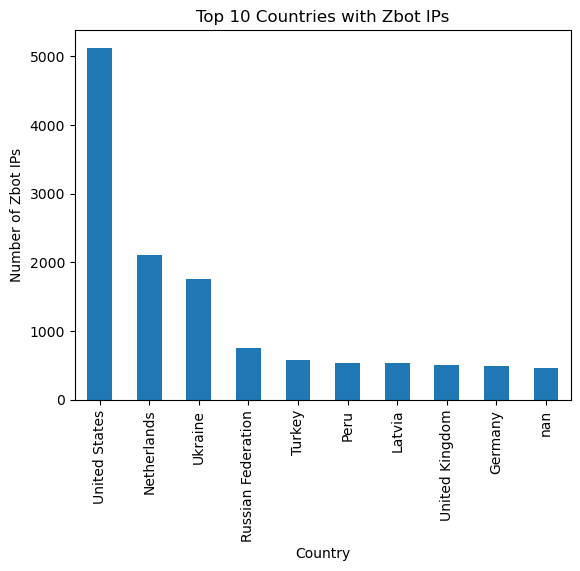

In [270]:
#task 11
country_counts = merged_data['country_name'].value_counts()
print(country_counts)

top_10_countries = country_counts[:10]
top_10_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Zbot IPs')
plt.title('Top 10 Countries with Zbot IPs')
plt.show()

In [271]:
#task 12
us_ips = merged_data[merged_data['country_name'] == 'United States']
us_corr = us_ips['Risk'].corr(us_ips['Reliability'])
print('Correlation between Risk and Reliability for US based IPs:', us_corr)

Correlation between Risk and Reliability for US based IPs: 0.23576850797493912


In [272]:
ru_ips = merged_data[merged_data['country_name'] == 'Russian Federation']
ru_corr = ru_ips['Risk'].corr(ru_ips['Reliability'])
print('Correlation between Risk and Reliability for Russian based IPs:', ru_corr)

Correlation between Risk and Reliability for Russian based IPs: 0.34266479281604373


In [273]:
if us_corr < ru_corr:
    print('The correlation between Risk and Reliability is stronger for Russian based IPs')
else:
      print('The correlation between Risk and Reliability is stronger for US based IPs')

The correlation between Risk and Reliability is stronger for Russian based IPs


In [274]:
#task 13
subnet_risk = merged_data.groupby('subnet_8bits')['Risk'].mean()
highest_risk_subnet = subnet_risk.idxmax()

print('The subnet with the highest average risk is:', highest_risk_subnet);

The subnet with the highest average risk is: 27.0.0.0/8
